In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("crop_production.csv")
df[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# Data Exploration

In [4]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [5]:
# Droping Nan Values
data = df.dropna()
print(data.shape)
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(242361, 7)
(3730, 6)


In [6]:
for i in data.columns:
    print("column name :",i)
    print("No. of column :",len(data[i].unique()))
    print(data[i].unique())

column name : State_Name
No. of column : 33
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
column name : District_Name
No. of column : 646
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG

In [7]:
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)

C:\Users\saira\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
data[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


# Data Visulization

C:\Users\saira\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


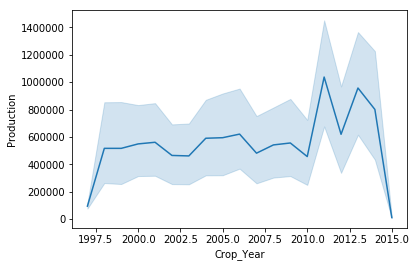

In [9]:
sns.lineplot(data["Crop_Year"],data["Production"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

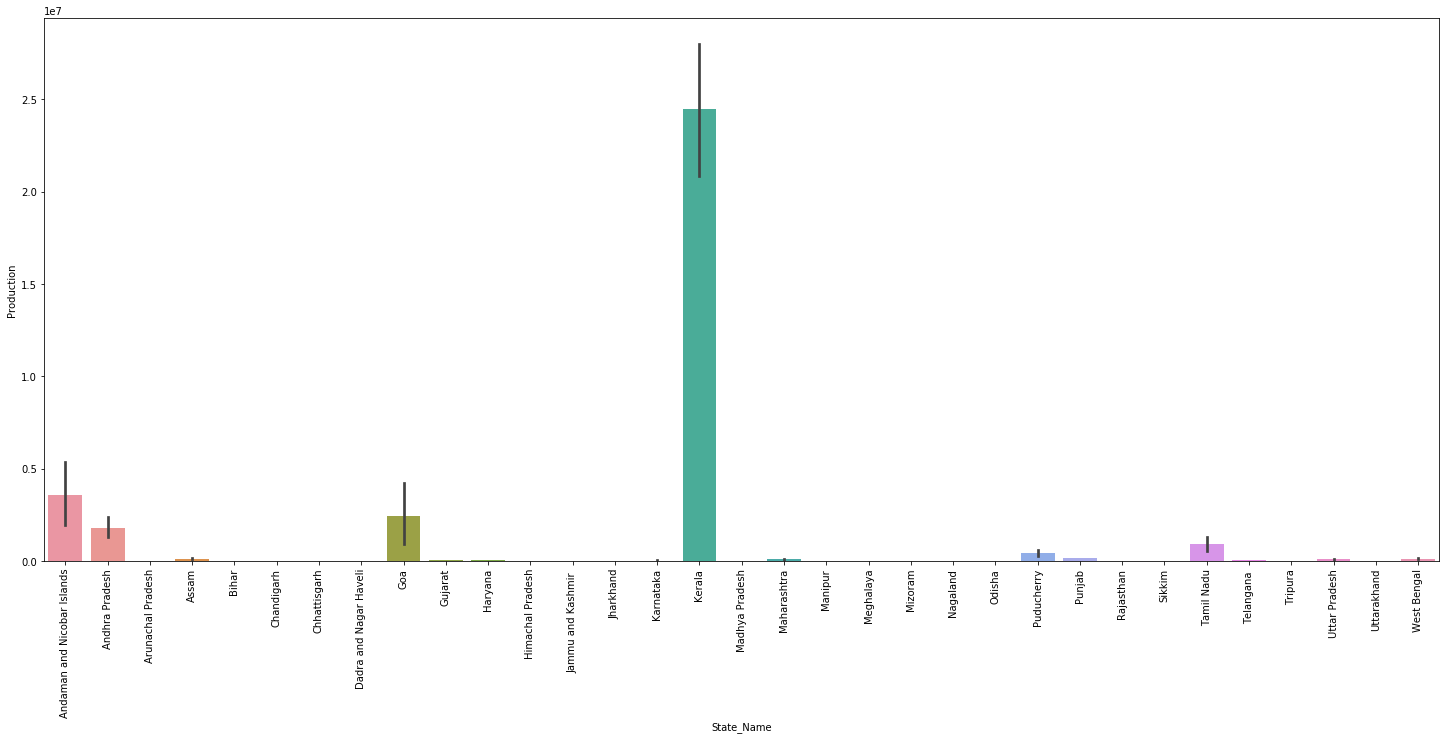

In [10]:
plt.figure(figsize=(25,10))
sns.barplot(data["State_Name"],data["Production"])
plt.xticks(rotation=90)

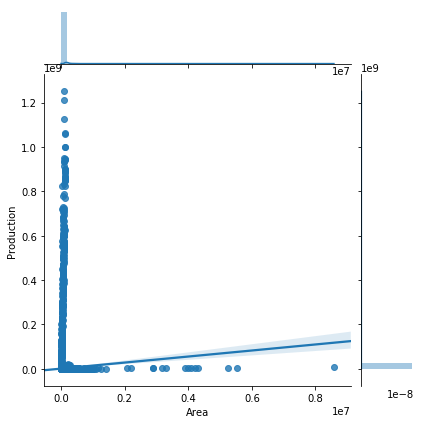

In [14]:
sns.jointplot(data["Area"],data["Production"],kind='reg')

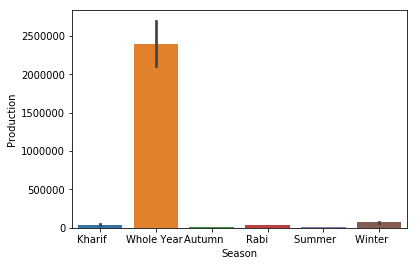

In [15]:
sns.barplot(data["Season"],data["Production"])

In [16]:
data.groupby("Season",axis=0).agg({"Production":np.sum})

,Production
Season,
Autumn,6.441377e+07
Kharif,4.029970e+09
Rabi,2.051688e+09
Summer,1.706579e+08
Whole Year,1.344248e+11
Winter,4.345498e+08


In [17]:
data["Crop"].value_counts()[:5]

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: Crop, dtype: int64

In [18]:
top_crop_pro = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08


## Each type of crops required various area & various season. so, I'm going to pic top crop from this data

### 1.Rice

In [19]:
rice_df = data[data["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(15082, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,2.273756e-07
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00,2.125005e-07
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84,3.618459e-07


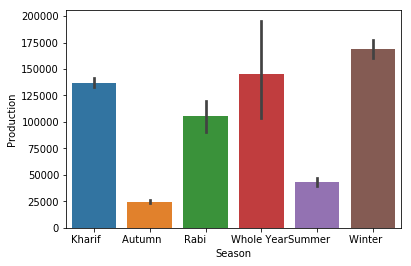

In [20]:
sns.barplot("Season","Production",data=rice_df)

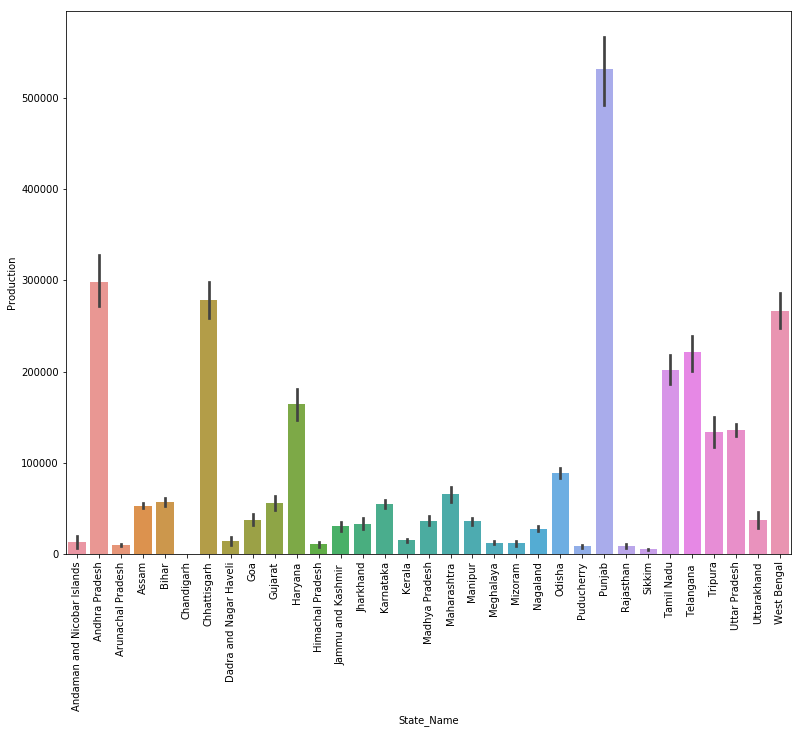

In [21]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [22]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

,District_Name,Production,precent_of_pro
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794


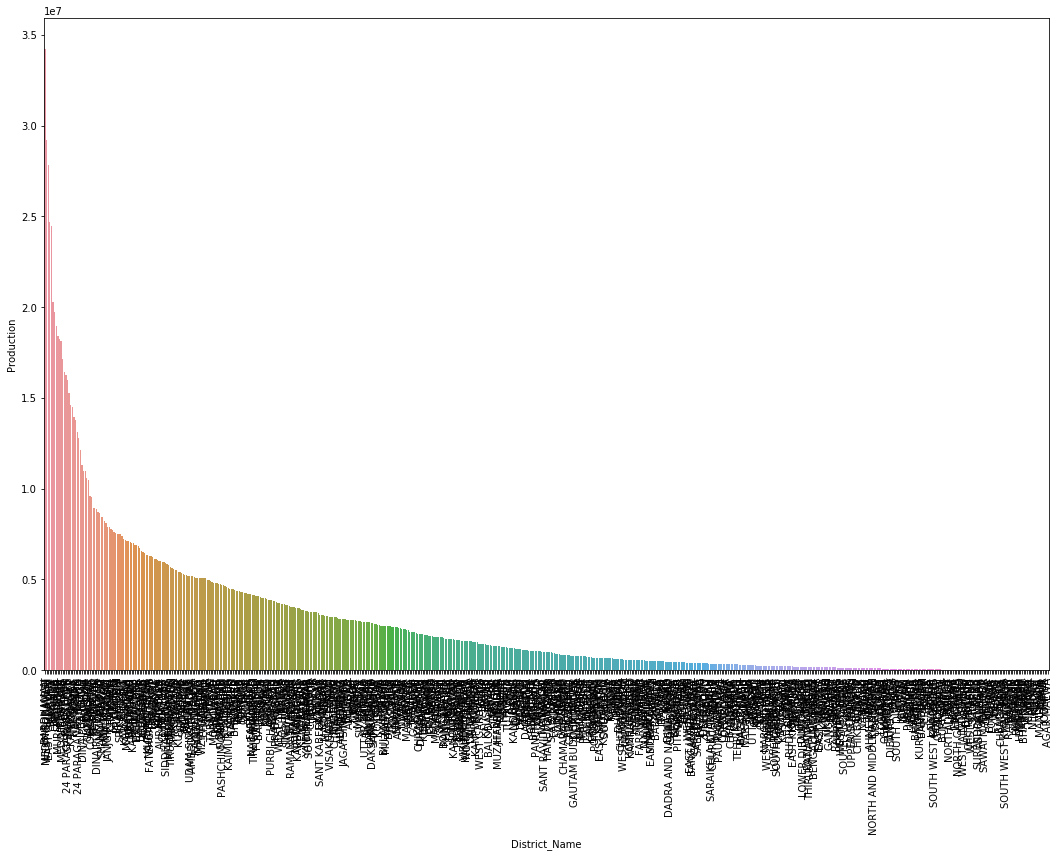

In [23]:
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_rice_pro_dis)
plt.xticks(rotation=90)
plt.show()

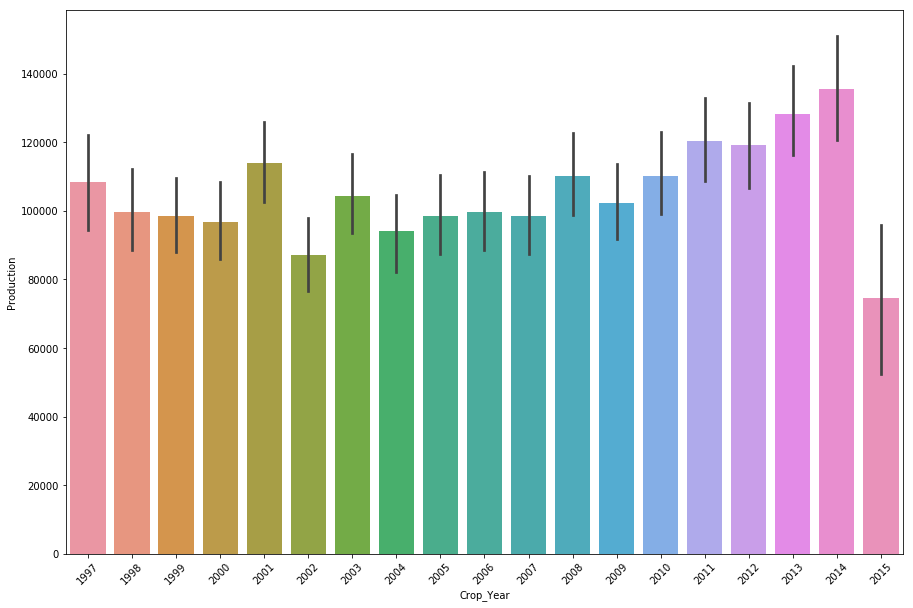

In [24]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=rice_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

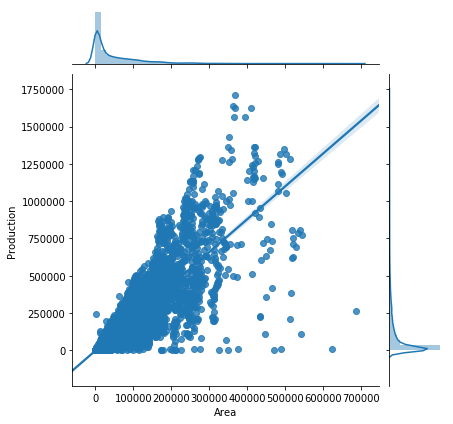

In [25]:
sns.jointplot("Area","Production",data=rice_df,kind="reg")

# Insights:
From Data Visualization:
Rice production is mostly depends on Season, Area, State(place).

# 2. Coconut

In [26]:
coc_df = data[data["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

(1958, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,0.046113
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0,0.045638
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0,0.047806


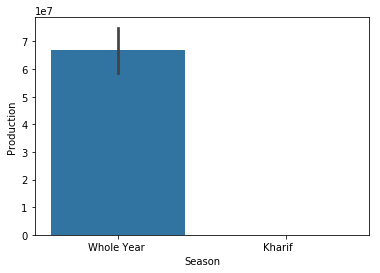

In [27]:
sns.barplot("Season","Production",data=coc_df)

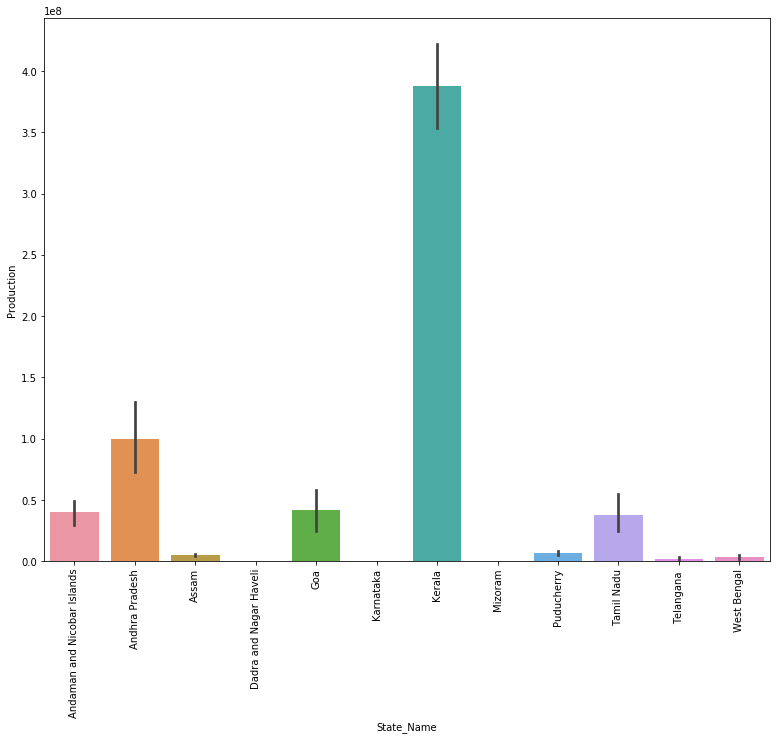

In [28]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()

In [29]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
77,KOZHIKODE,1.527871e+10,11.754512
86,MALAPPURAM,1.451252e+10,11.165052
129,THIRUVANANTHAPURAM,1.001337e+10,7.703678
131,THRISSUR,9.920739e+09,7.632416
64,KANNUR,9.780310e+09,7.524379


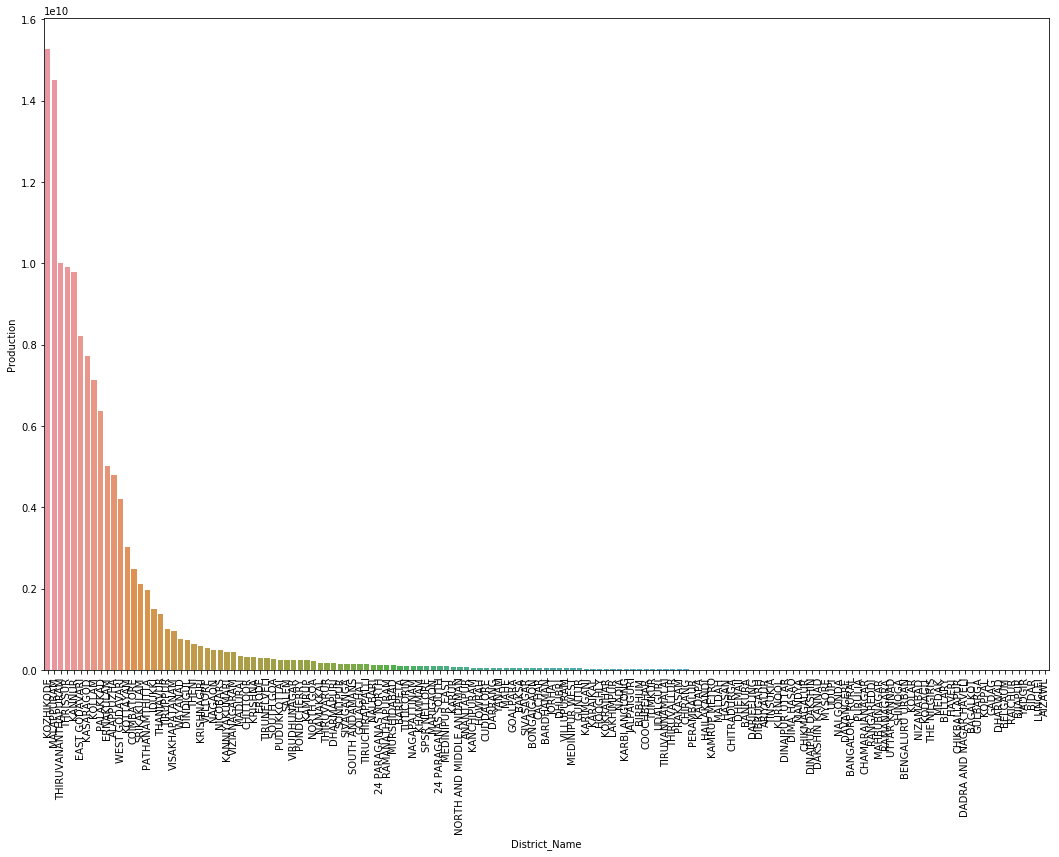

In [30]:
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_coc_pro_dis)
plt.xticks(rotation=90)
plt.show()

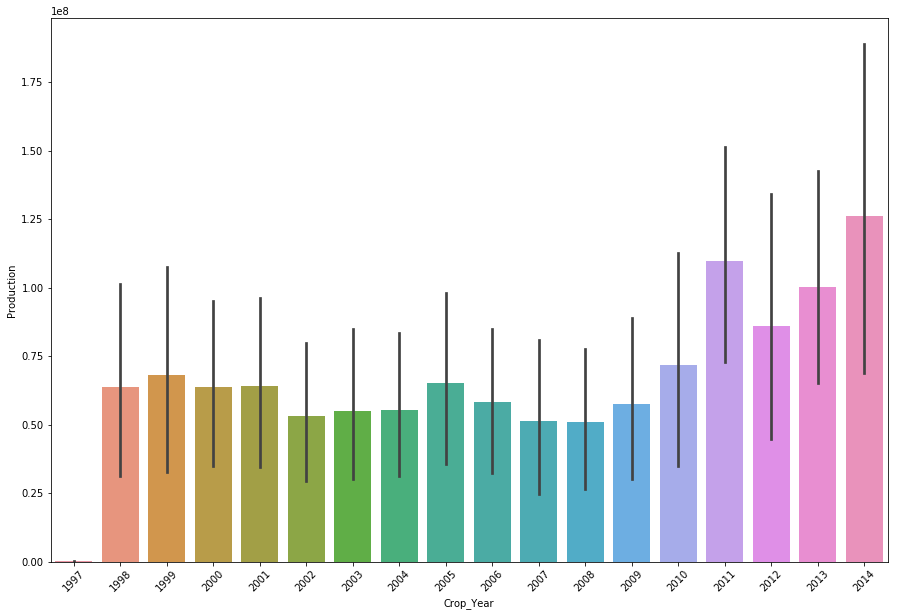

In [31]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=coc_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

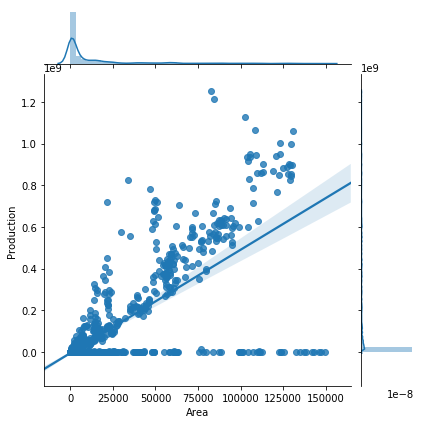

In [32]:
sns.jointplot("Area","Production",data=coc_df,kind="reg")

# Insight from Cocunut Production

* cocunut production is directly proportional to area
* its production is also gradually increasing over a time of period
* production is highin kerala state
* it does not depends on season

# 3. Sugarcane

In [33]:
sug_df = data[data["Crop"]=="Sugarcane"]
print(sug_df.shape)
sug_df[:3]

(7827, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,1.416670e-09
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.0,7.083351e-10
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.0,2.833340e-08


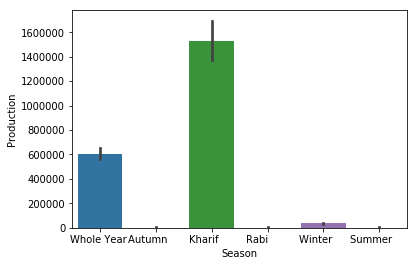

In [34]:
sns.barplot("Season","Production",data=sug_df)

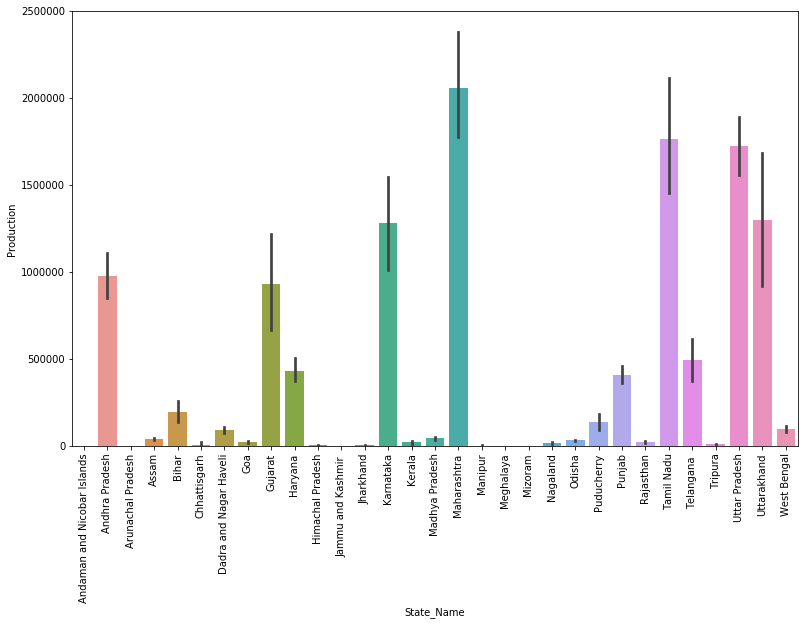

In [35]:
plt.figure(figsize=(13,8))
sns.barplot("State_Name","Production",data=sug_df)
plt.xticks(rotation=90)
plt.show()

In [36]:
top_sug_pro_dis = sug_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sug_pro_dis[:5]
sum_max = top_sug_pro_dis["Production"].sum()
top_sug_pro_dis["precent_of_pro"] = top_sug_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_sug_pro_dis[:5]

,District_Name,Production,precent_of_pro
360,MUZAFFARNAGAR,258698795.0,4.673296
81,BIJNOR,230907185.0,4.171251
283,KHERI,224383685.0,4.053407
63,BELGAUM,198207649.0,3.580546
294,KOLHAPUR,157210426.0,2.839947


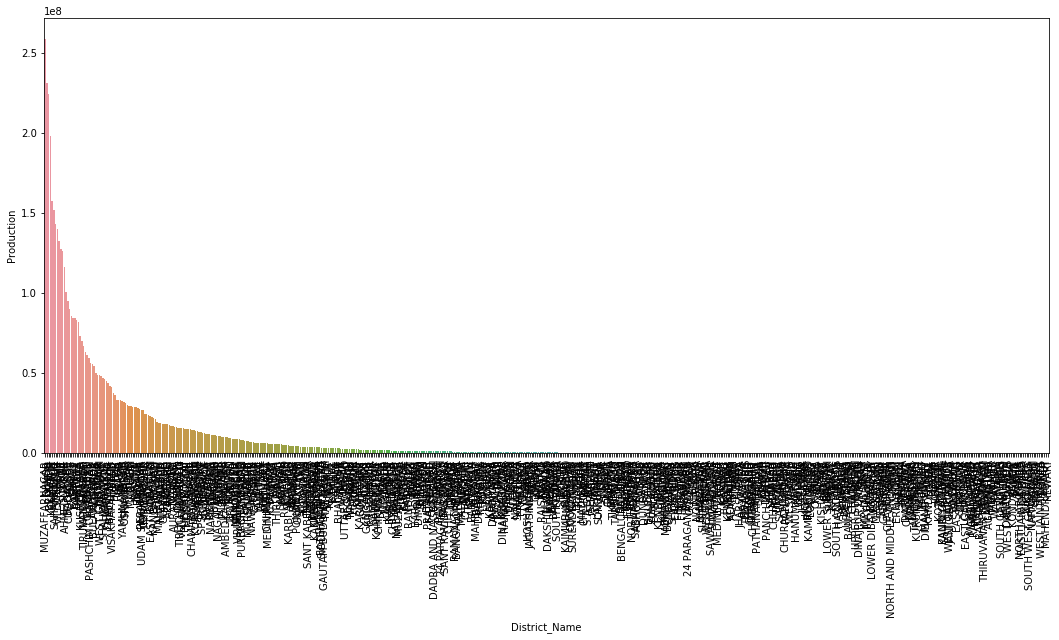

In [37]:
plt.figure(figsize=(18,8))
sns.barplot("District_Name","Production",data=top_sug_pro_dis)
plt.xticks(rotation=90)
plt.show()

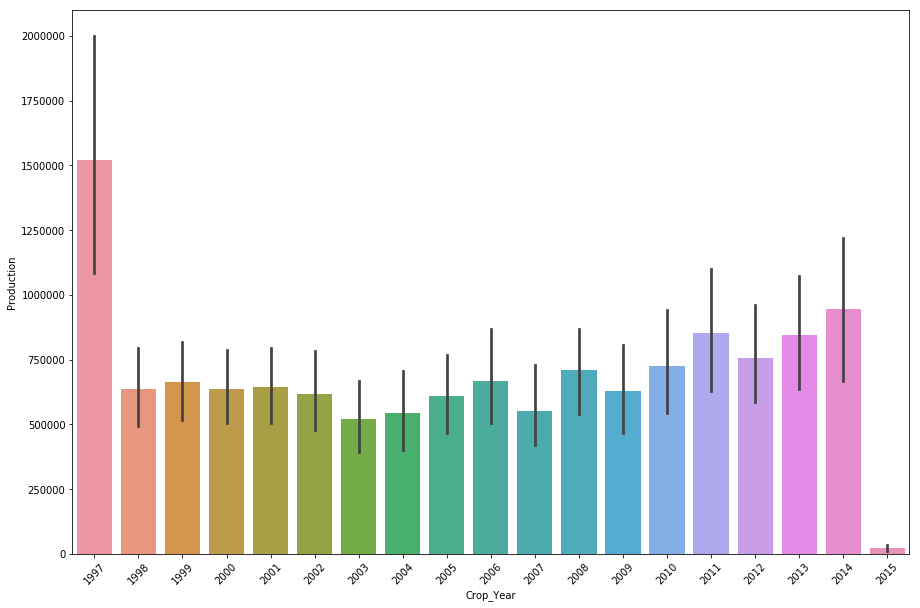

In [38]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=sug_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

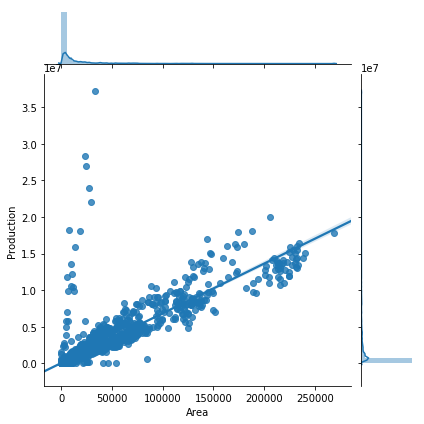

In [39]:
sns.jointplot("Area","Production",data=sug_df,kind="reg")

# Insighits:
* Sugarecane production is directly proportional to area
* And the production is high in some state only.

# Feature Selection

In [40]:
data1 = data.drop(["District_Name","Crop_Year"],axis=1)

In [41]:
data_dum = pd.get_dummies(data1)
data_dum[:5]

,Area,Production,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1.416670e-06,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,7.083351e-10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,2.273756e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,4.540428e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1.168753e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Test Train Split

In [42]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)


x_train : (162381, 165)
x_test : (79980, 165)
y_train : (162381, 1)
y_test : (79980, 1)


In [43]:
x_train[:5]

,Area,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
4843,785.0,1.486087e-06,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20626,1250.0,5.829598e-07,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240277,2.0,1.452087e-07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20664,60.0,4.646678e-07,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157859,605.0,6.729184e-08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model -1: Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
preds = model.predict(x_test)

C:\Users\saira\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saira\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
from sklearn.metrics import r2_score
r = r2_score(y_test,preds)
print("R2score when we predict using Randomn forest is ",r)

R2score when we predict using Randomn forest is  0.9974962962449043


# Model -2 : Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
preds = model.predict(x_test)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,preds)
r2_score(y_test,preds)

1.0

# Prediction
Model 1: Randomn forest has high r2score when compare to other model

In [49]:
tst = test.drop(["District_Name","Crop_Year"],axis=1)
tst_dum = pd.get_dummies(tst)
tst_dum[:5]

,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Goa,State_Name_Gujarat,...,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Crop_other oilseeds
46,795.67,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,17.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623,1000.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630,1000.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,8.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y_test = tst_dum.copy()
print(x_train.shape)
print(y_test.shape)

(162381, 165)
(3730, 92)


In [51]:
def common_member(x_train,x_test): 
    a_set =  set(x_train.columns.tolist())
    b_set =  set(x_test.columns.tolist())
    if (a_set & b_set): 
        return list(a_set & b_set) 

In [52]:
com_fea = common_member(x_train,tst_dum)
len(com_fea)

92

In [53]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train[com_fea],y_train)
preds = model.predict(y_test[com_fea])

C:\Users\saira\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saira\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
preds

array([828.5       ,  11.66029412, 781.1       , ..., 432.369     ,
       367.        ,   1.        ])

In [55]:
test["production"] = preds

In [56]:
test[:10]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,828.500000
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,11.660294
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,781.100000
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,1074.825000
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,3.866667
723,Andhra Pradesh,ANANTAPUR,2010,Kharif,Other Kharif pulses,1.00,13.383544
1153,Andhra Pradesh,CHITTOOR,2001,Rabi,Wheat,4.00,3.170000
1317,Andhra Pradesh,CHITTOOR,2004,Rabi,Wheat,2.00,2.000000
1419,Andhra Pradesh,CHITTOOR,2007,Kharif,Moong(Green Gram),1000.00,781.100000
1423,Andhra Pradesh,CHITTOOR,2007,Kharif,Small millets,1000.00,486.500000


In [57]:
test.to_csv('Prediction.csv')